In [7]:
#When updating the imported Vivado files (.bit, .hwh, .tcl), it is necessary to restart the PL.
from pynq import PL
PL.reset()

In [136]:
#Libraries and Overlay upload

from pynq import Overlay, Clocks, allocate
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt
import time

overlay = Overlay('trig_DMA.bit')

print("Accesible IP-Cores:")
overlay.ip_dict.keys()

Accesible IP-Cores:


dict_keys(['axi_dma_0', 'pretrig_and_mux_signal', 'threshold_control', 'processing_system7_0'])

In [137]:
#DMA initialization
dma = overlay.axi_dma_0   
dma_recv = dma.recvchannel

#GPIO control of pretrigger_data and signal_selector declaration
xgpio_TRIG_MUX = overlay.pretrig_and_mux_signal

#GPIO control of threshold_control
xgpio_thresh = overlay.threshold_control

#--------------------------------------------------------------------

#Pretrigger - samples before trigger
xgpio_TRIG_MUX.write(0, 200)  

#Predefined signal selection

#0x0 DC CONSTANT 0.5v monopolar mode
#0x1 FILTERED SIGNAL
#0x2 NOISY SIGNAL
#0x3 EXPONENTIAL
xgpio_TRIG_MUX.write(8,0x1)

#Threshold Control
xgpio_thresh.write(0, 250)   #Thresh Level

window_samples = 1024
xgpio_thresh.write(8, window_samples)    #Samples in window


#--------------------------------------------------------------------

buffer_size = window_samples #DMA buffer size assignment

#Input buffer declaration
input_buffer = allocate(shape=(buffer_size+16,)) #, dtype=np.uint16)
data_resol=8  #nbits data resolution


ADQUISITION READY
DMA idle Status: True


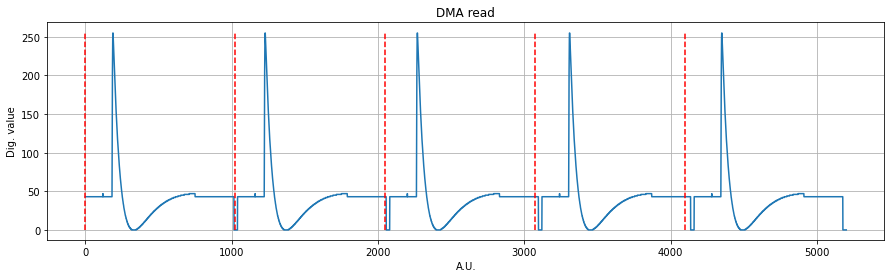

In [140]:
data_out = []
t, t_0 = [], 0
cycles = 5
start = time.time()


for i in range(0,cycles):
    #time.sleep(.1)
    
    #Transfer FIFO memory to input_buffer
    #if dma.recvchannel.idle:
    dma.recvchannel.transfer(input_buffer)
    dma.recvchannel.wait()
    
    data_out.append(input_buffer)  
    

data_out = np.array(data_out).flatten()

print('ADQUISITION READY')
print('DMA idle Status:',dma.recvchannel.idle)

plt.figure(figsize=(15, 4))
plt.plot(data_out)

#Subdivision of individual DMA adquisition
for k in range(0, cycles):
    plt.vlines(1024*k, 0, 2**data_resol, color='red', linestyle='dashed')
    
plt.title("DMA read")
plt.xlabel("A.U.")
plt.ylabel("Dig. value")
#plt.ylim(200, 250)
plt.grid()
plt.show()
#np.savetxt("data_out.txt", data_out)


In [171]:
data_out[1227]


249